# 斜率

## step1. 导入包，造数据 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame()
df

""


In [6]:
df.loc[:, 'x'] = np.linspace(start=0, stop=20, num=60)
df

,x
0,0.000000
1,0.338983
2,0.677966
3,1.016949
4,1.355932
5,1.694915
6,2.033898
7,2.372881
8,2.711864
9,3.050847


In [ ]:
df.loc[:, 'w'] = [1] * 30 + [5] * 30
df.loc[:, 'const'] = 1
df.loc[:, 'y'] = 2 * df.x + df.w * np.random.randn(60) + 3

## step2. 拟合 

In [2]:
import statsmodels.api as sm
lm_s = sm.WLS(df.y, df.loc[:, ['const', 'x']], weights=1. / (df.w ** 2)).fit()

## step3. 画图 

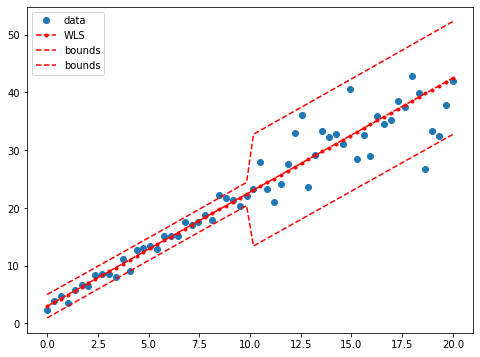

In [4]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(lm_s)
#     predstd : standard error of prediction
#     interval_l, interval_u : lower und upper confidence bounds
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df.x, df.y, 'o', label="data")
ax.plot(df.x, lm_s.predict(df.loc[:, ['const', 'x']]), 'r--.', label="WLS")
ax.plot(df.x, np.array([iv_l,iv_u]).T, 'r--', label="bounds")
ax.legend(loc='best')
plt.show()